In [23]:
# Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data = pd.read_csv('digits_recognition.csv', header=None)

In [25]:
#check for missing values
data.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

In [26]:
# Extract the feature vector and the output label
# the feature vector starts from column 1 to the last column
X = data.values[:, 1:]  
y = data.values[:, 0]
X.shape

(3000, 784)

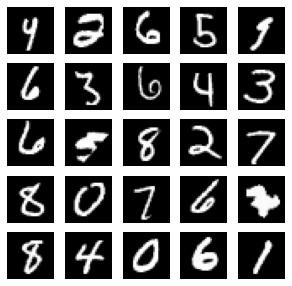

In [27]:
_, axarr = plt.subplots(5,5,figsize=(5,5))
for i in range(5):
    for j in range(5):
        ## get an int random number from 5000 examples
        r = np.random.randint(X.shape[0])
        ## get that image from X
        XA = X[r].reshape((28, 28)) 
        ## show in sub-figure (i, j)
        axarr[i,j].imshow(XA, cmap='gray')  
        axarr[i,j].axis('off') ## turn off axis...
plt.show()

In [28]:
# scale the feature vector
X.min()
X.max()
X = X/(X.max() - X.min())

In [29]:
# split the feature vector and output label into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)
print(x_train.shape)
print(x_test.shape)
print('x_train.shape[0]+x_test.shape[0]=', x_train.shape[0] + x_test.shape[0])


(2400, 784)
(600, 784)
x_train.shape[0]+x_test.shape[0]= 3000


In [30]:
# Use knn to find best fit
from sklearn.neighbors import KNeighborsRegressor
test_scores = []
train_scores = []
K = []
for k in range(1, 12):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    K.append(k)
    test_scores.append(knn.score(x_test, y_test))
    train_scores.append(knn.score(x_train, y_train))
    print('K=', K[k-1], ' test_score=', test_scores[k-1], '  train_test=', train_scores[k-1])

m = max(test_scores)
i = test_scores.index(m)
print('max accuracy ', m, '  train score: ', train_scores[i], '   for K=', K[i])

K= 1  test_score= 0.8260516258459351   train_test= 1.0
K= 2  test_score= 0.8410234597527478   train_test= 0.9601590922765255
K= 3  test_score= 0.8435922431910192   train_test= 0.9386789848024436
K= 4  test_score= 0.8510487690295712   train_test= 0.9224833134498631
K= 5  test_score= 0.8539849414035221   train_test= 0.9088533356901433
K= 6  test_score= 0.8578998379021233   train_test= 0.9021644927779268
K= 7  test_score= 0.849411444004715   train_test= 0.8914768846686887
K= 8  test_score= 0.843453737562268   train_test= 0.8826804460583971
K= 9  test_score= 0.8380954515773675   train_test= 0.8771801349663622
K= 10  test_score= 0.8377709214185045   train_test= 0.8709600929654994
K= 11  test_score= 0.835787711978485   train_test= 0.8675140119532563
max accuracy  0.8578998379021233   train score:  0.9021644927779268    for K= 6


In [21]:
from sklearn.model_selection import GridSearchCV   # Grid search with cross validation

param = {'n_neighbors': list(range(1, 50))}

gs = GridSearchCV(KNeighborsRegressor(), param, cv=4)
result = gs.fit(x_train, y_train)

print(result.best_score_)
print(result.best_estimator_)
print(gs.score(x_test, y_test))

0.8429336873552071
KNeighborsRegressor(n_neighbors=2)
0.8410234597527478
